In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare

In [2]:
# import database
df = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 4/merch_23(1).csv')

# A.
Numeric: merch_total, return_total

Categorical: day_code, returns,

In [3]:
df.head()

,purchaseID,day_code,merch_total,returns,return_total
0,1,R,17.23,0,0.00
1,2,W,34.83,0,0.00
2,3,R,25.02,1,6.26
3,4,R,39.15,0,0.00
4,5,H,18.38,0,0.00


# B.

Here is my proofread of your writing:

The last item I ordered then returned is a hiking backpack bought on Amazon, because the size was not as expected even though there were dimensions in the description. 

I think many reasons can make the return process for online shopping too cumbersome for the consumer, like:

- Unclear Instructions: Consumers might find it difficult to find the right place to start the return process, such as messy website content.

- Strict Return Policies: Some merchants might require the product to be unopened and unused. 

- Inconvenient Return Locations: Some merchants might require consumers to ship back the product themselves, while there is no close drop-off location.

- Long Wait Times for Refunds.

Likewise, it also makes the return process cumbersome for online merchants in some aspects, such as:

- Unpredictable Inventory: Returned items make inventory levels unpredictable -- having too many items would be wasteful, especially for those with short shelf lives.

- Product Quality Concerns: Once an item is returned, we can't guarantee it's still brand-new. Re-shipping it to another consumer may reveal flaws and damage the company's image.

- Extra Costs: If online merchants don't cover return shipping fees, the consumer may be dissatisfied.

# C.

Before starting to analyze data, I want to check if there is any unnormal data.

In [4]:
# Check the NA values
df.isna().sum()

purchaseID      0
day_code        0
merch_total     0
returns         0
return_total    0
dtype: int64

When checking the range of numeric variables, 'merch_total' and 'return_total' have megative values, which are quite not right since the min should be 0 --> meaning they did not spend any money. So I exclude thoes records since I cannot find any reasonable reason to replace negative values to other numeric such as 0 or mean.

In [5]:
# check numeric variable
df.describe()

,purchaseID,merch_total,returns,return_total
count,2850.000000,2850.000000,2850.000000,2850.00000
mean,1425.500000,33.539060,0.370175,6.24307
std,822.868459,11.590251,0.482936,10.88461
min,1.000000,-7.000000,0.000000,-7.00000
25%,713.250000,25.782500,0.000000,0.00000
50%,1425.500000,33.630000,0.000000,0.00000
75%,2137.750000,41.190000,1.000000,9.80000
max,2850.000000,78.750000,1.000000,57.13000


In [6]:
df[df['merch_total'] < 0]

,purchaseID,day_code,merch_total,returns,return_total
416,417,W,-1.25,0,-1.25
1276,1277,R,-0.33,0,-0.33
1545,1546,W,-3.82,1,-3.82
1583,1584,R,-6.05,0,-6.05
1866,1867,R,-6.36,1,-6.36
2143,2144,R,-7.00,0,-7.00
2253,2254,R,-4.49,1,-4.49


In [7]:
# identiy which purchaseID are invalid
invalid_ID = []
for index, row in df.iterrows():
    if row['merch_total'] < 0:
        invalid_ID.append(row['purchaseID'])
invalid_ID

[417, 1277, 1546, 1584, 1867, 2144, 2254]

In [8]:
# Remove invalid purchaseID and check again
df2 = df[~df['purchaseID'].isin(invalid_ID)]
df2.describe()

,purchaseID,merch_total,returns,return_total
count,2843.000000,2843.000000,2843.000000,2843.000000
mean,1425.109391,33.631945,0.370032,6.268748
std,823.352157,11.451499,0.482898,10.885035
min,1.000000,1.600000,0.000000,0.000000
25%,712.500000,25.845000,0.000000,0.000000
50%,1424.000000,33.650000,0.000000,0.000000
75%,2137.500000,41.205000,1.000000,9.860000
max,2850.000000,78.750000,1.000000,57.130000


# Observation from the plot
After removing invalid records, I built the plot to see the average merchandise total for each day type. The day type with the highest average merchandise total is 'Holiday', followed by 'Regular', then 'Weekend'. 

Higher average spending on holidays is expected, as holidays often make people happier, thus boosting their desire to spend more on items that bring them joy—a sentiment echoed by numerous psychologists according to my research on Google. 

Surprisingly, the average spending on regular days is slightly higher than on weekends, when people usually feel happier. If there are no special promotions during regular days, this suggests that other factors may contribute to this situation, such as work-related stress leading people to seek relief through online shopping, and this is a opportunity for us to increase the revenue with more analysis.

Text(0, 0.5, 'Average Merch Total')

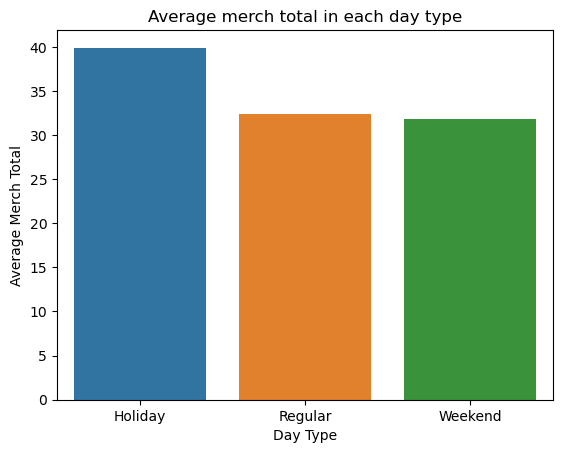

In [9]:
# Plotting
code_to_day = {'H': 'Holiday', 'R': 'Regular', 'W': 'Weekend'}
avg_merch_daytype = df2.groupby('day_code')['merch_total'].mean().reset_index()
avg_merch_daytype['day_code'] = avg_merch_daytype['day_code'].map(code_to_day)
sns.barplot(x = 'day_code',y='merch_total',data = avg_merch_daytype,errorbar=None)
plt.title('Average merch total in each day type')
plt.xlabel('Day Type')
plt.ylabel('Average Merch Total')

# D.

In [10]:
df3 = df2
df3['return_proportion'] = df3['return_total'] / df3['merch_total']
df3.head()

/var/folders/gn/9mm5s2ks2t5_qlwl1wbn4vp40000gn/T/ipykernel_31868/4064899382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['return_proportion'] = df3['return_total'] / df3['merch_total']


,purchaseID,day_code,merch_total,returns,return_total,return_proportion
0,1,R,17.23,0,0.00,0.0000
1,2,W,34.83,0,0.00,0.0000
2,3,R,25.02,1,6.26,0.2502
3,4,R,39.15,0,0.00,0.0000
4,5,H,18.38,0,0.00,0.0000


# E.

## a.
The null hypothesis here is that 'there is no difference between the means of the two groups being compared".

## b.
I prefer to use alpha = 0.05 as my threshold for this test, because I think 0.05 can apply to general test situation except for those require extreme precise outcome, such as life science.

## c.
The Bonferroni correction is a statistical adjustment made to counteract the problem of multiple comparisons. It is used to reduce the chances of obtaining false-positive results (Type I errors) when performing multiple statistical tests.

The correction with Bonferroni is `corrected alpha = original alpha / number of comparisions`

## d.
My new alpha htreshold under Bonferroni correction is `0.05 / 3 = 0.0167`

## e.

In [11]:
df3.groupby('day_code')['return_proportion'].mean()

day_code
H    0.218212
R    0.174891
W    0.182865
Name: return_proportion, dtype: float64

In [12]:
# Performaing t test
a = 0.0167
t_WR,p_WR = stats.ttest_ind(df3.loc[df3['day_code']=='W','return_proportion'].values,
                     df3.loc[df3['day_code']=='R','return_proportion'].values,equal_var=False)
t_WH,p_WH = stats.ttest_ind(df3.loc[df3['day_code']=='W','return_proportion'].values,
                     df3.loc[df3['day_code']=='H','return_proportion'].values,equal_var=False)
t_RH,p_RH = stats.ttest_ind(df3.loc[df3['day_code']=='R','return_proportion'].values,
                     df3.loc[df3['day_code']=='H','return_proportion'].values,equal_var=False)
p_result = [p_WR,p_WH,p_RH]
a_result = ["Reject null hypothesis" if i < a else "Accept null hypothesis" for i in p_result]
ttest_result = pd.DataFrame({
    'Comparison' : ['Weekend x Regular Day','Weenend x Holiday','Regular Day x Holiday'],
    'p value' : p_result,
    'Test Result' : a_result
})
ttest_result

,Comparison,p value,Test Result
0,Weekend x Regular Day,0.512313,Accept null hypothesis
1,Weenend x Holiday,0.040996,Accept null hypothesis
2,Regular Day x Holiday,0.008406,Reject null hypothesis


The t-test results indicate that there is no significant difference in the return proportion between weekends and regular days (p = 0.512313) or weekends and holidays (p = 0.040996), meaning customers are returning goods at similar rates across these day types. However, the return proportion is significantly different between regular days and holidays (p = 0.008406), meaning customers are actually return more items purchased on holiday comparing to regular day.

I think the management can analyze the types of products purchased and the promotions run on holidays that result in lower return rates, with the aim of replicating successful aspects throughout the year.

# F.

In [13]:
df4 = df3[df3['returns'] == 1]
df4.head()

,purchaseID,day_code,merch_total,returns,return_total,return_proportion
2,3,R,25.02,1,6.26,0.250200
6,7,W,33.61,1,29.07,0.864921
8,9,W,27.59,1,5.98,0.216745
9,10,W,16.61,1,9.44,0.568332
10,11,W,29.32,1,0.62,0.021146


In [14]:
a = 0.0167
t_WR_return,p_WR_return = stats.ttest_ind(df4.loc[df4['day_code']=='W','return_proportion'].values,
                     df4.loc[df4['day_code']=='R','return_proportion'].values,equal_var=False)
t_WH_return,p_WH_return = stats.ttest_ind(df4.loc[df4['day_code']=='W','return_proportion'].values,
                     df4.loc[df4['day_code']=='H','return_proportion'].values,equal_var=False)
t_RH_return,p_RH_return = stats.ttest_ind(df4.loc[df4['day_code']=='R','return_proportion'].values,
                     df4.loc[df4['day_code']=='H','return_proportion'].values,equal_var=False)
p_result_return = [p_WR_return,p_WH_return,p_RH_return]
a_result_return = ["Reject null hypothesis" if i < a else "Accept null hypothesis" for i in p_result]
ttest_result_return = pd.DataFrame({
    'Comparison' : ['Weekend x Regular Day','Weenend x Holiday','Regular Day x Holiday'],
    'p value' : p_result_return,
    'Test Result' : a_result_return
})
ttest_result_return

,Comparison,p value,Test Result
0,Weekend x Regular Day,0.460235,Accept null hypothesis
1,Weenend x Holiday,0.000317,Accept null hypothesis
2,Regular Day x Holiday,0.000013,Reject null hypothesis


When focusing on those who returned something, there is even a significant differences between weekend and holiday day, indicating that the management should put extra effor on reviewing holiday promotions and products. Some issues might be misleading promotion on holidays or lower-quality products on holiday.

# Part II Chi-Square Goodness of Fit

## A. Testing whether day type impacts the likelihood that a consumer will return something after making a purchase.
The null hypothesis here would be "there is no impact of returning goods based on different day type", so our `expected returns on each day type`would be: `( Total purchases / Total returns) × Total purchases for day type `.


The return rate is 37%, calculating based on the `total return number / total purchase number`.
From the calculation, the expected returns of each day type is approximately:
- Holiday: 206
- Regular Day: 485
- Weekend: 359

In [15]:
# expeted and actual returns on each day type
return_rate = round(len(df4) / len(df3),2)
print('Return rate is: ',return_rate)
day_type = ['Holiday','Regular Day','Weekend']
expected = [len(df3[df3['day_code'] == 'H']) * return_rate,
           len(df3[df3['day_code'] == 'R'])*return_rate,
            len(df3[df3['day_code'] == 'W'])*return_rate]
proportional_factor = len(df4) / sum(expected)
adjusted_expected = [value * proportional_factor for value in expected]

print('Expected return on Holiday, Regular Day and Weekend is: ',adjusted_expected)

Return rate is:  0.37
Expected return on Holiday, Regular Day and Weekend is:  [206.84769609567363, 485.8515652479776, 359.300738656349]


## B. Using the actual and run the chi-square test.

The p-value is 0.97 -- far larger than my ahpla threshold (0.05), meaning based on this statistical testing I do not have evidence to reject null hyphothesis.

The conclusion from the chi-square testing is that different day type does not impact the likelihood that a consumer will return something after making a purchase. 

In [16]:
actual = [len(df4[df4['day_code'] == 'H']),
           len(df4[df4['day_code'] == 'R']),
            len(df4[df4['day_code'] == 'W'])]
chi_df = pd.DataFrame({
    'day type':day_type,
    'Expect': adjusted_expected,
    'Actual': actual
})

chi_df

,day type,Expect,Actual
0,Holiday,206.847696,208
1,Regular Day,485.851565,482
2,Weekend,359.300739,362


In [17]:
chi,p_chi = chisquare(f_obs =chi_df.iloc[:,1] ,f_exp = chi_df.iloc[:,2])
print('The chisquare value is: ',chi)
print('p-value is: ',p_chi)

SyntaxError: incomplete input (2434410219.py, line 3)

## C. Calculating chi-square number

In [18]:
chi_number = []
for index, row in chi_df.iterrows():
    chi_value = ((row['Actual'] - row['Expect']) ** 2) / row['Expect']
    chi_number.append(chi_value)

chi_square_statistic = sum(chi_number)
print('The chi number is: ',chi_square_statistic)


The chi number is:  0.05723064753543601


# Part III Analysis on Tableau

In the top left bar plot comparing the average merch_total on each day code, we can seep people spend more in "holiday" in average comparing to regular day and weekend. As we look in more depth from the boxplot in top right, the distrubition in holiday is also higher than other two day types, even the minumim spending in holiday is quite equivlent to the Q1 of other two day types.

Then in the bottom left we can check the correlation of merch_total and return_total of each day type, and we discover that in holiday, people who spend more on initial purchase will likely return more, indicating there might be some reason causing those who making purchase on holiday feel unsatisfied. Lastly in the pie chart on the botton right, we can see the percentage of how many people making returns regarless of day code, which is 62.98%. In total this is still a large percentage -- more than 50%, so I think we can also make more analysis on the reason why people making returns.

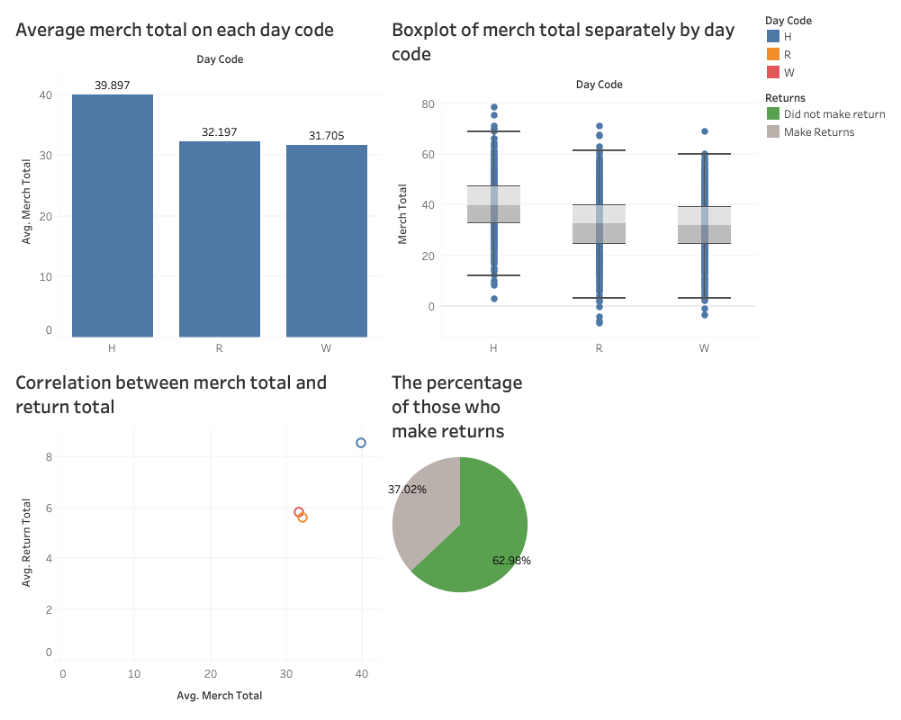